In [1]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
def load_data(with_mask_path, without_mask_path, image_size=(100, 100)):
    data = []
    labels = []
    
    for file in os.listdir(with_mask_path):
        try:
            path = os.path.join(with_mask_path, file)
            img = Image.open(path).convert('RGB')
            img = img.resize(image_size)
            data.append(np.array(img))
            labels.append(0)  # 0 = with_mask
        except:
            continue

    for file in os.listdir(without_mask_path):
        try:
            path = os.path.join(without_mask_path, file)
            img = Image.open(path).convert('RGB')
            img = img.resize(image_size)
            data.append(np.array(img))
            labels.append(1)  # 1 = without_mask
        except:
            continue

    data = np.array(data) / 255.0
    labels = to_categorical(labels, 2)
    
    return shuffle(data, labels)


In [3]:
with_mask_path = r"C:\Users\ADARSH\Downloads\DEEP_LEARNING\Face-Mask-Detection-Dataset\with_mask"
without_mask_path = r"C:\Users\ADARSH\Downloads\DEEP_LEARNING\Face-Mask-Detection-Dataset\without_mask"

X, y = load_data(with_mask_path, without_mask_path)


C:\Users\ADARSH\anaconda3\envs\DEEP_LEARNING\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


C:\Users\ADARSH\anaconda3\envs\DEEP_LEARNING\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7498 - loss: 0.4912 - val_accuracy: 0.8855 - val_loss: 0.2721
Epoch 2/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.8964 - loss: 0.2496 - val_accuracy: 0.9027 - val_loss: 0.2469
Epoch 3/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9205 - loss: 0.2021 - val_accuracy: 0.9451 - val_loss: 0.1735
Epoch 4/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.9426 - loss: 0.1706 - val_accuracy: 0.9471 - val_loss: 0.1431
Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.9570 - loss: 0.1237 - val_accuracy: 0.9358 - val_loss: 0.1781
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9527 - loss: 0.1339 - val_accuracy: 0.9451 - val_loss: 0.1391
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.9682 - loss: 0.0919 - val_accuracy: 0.9530 - val_loss: 0.1270
Epoch 8/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9767 - loss: 0.0737 - 

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9568 - loss: 0.1515
Test Accuracy: 95.37%


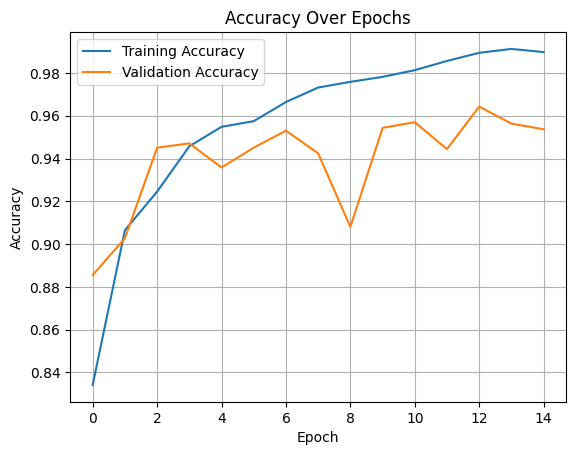

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


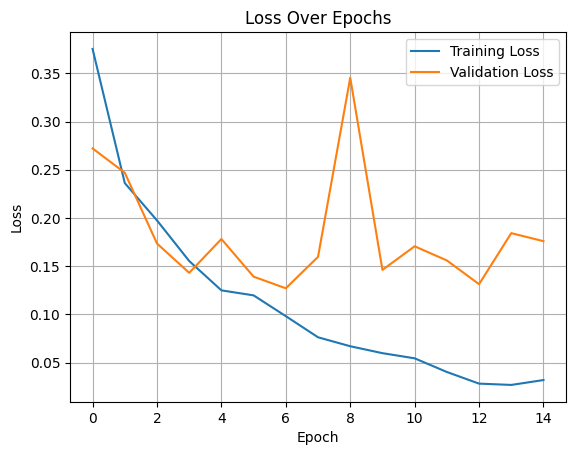

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


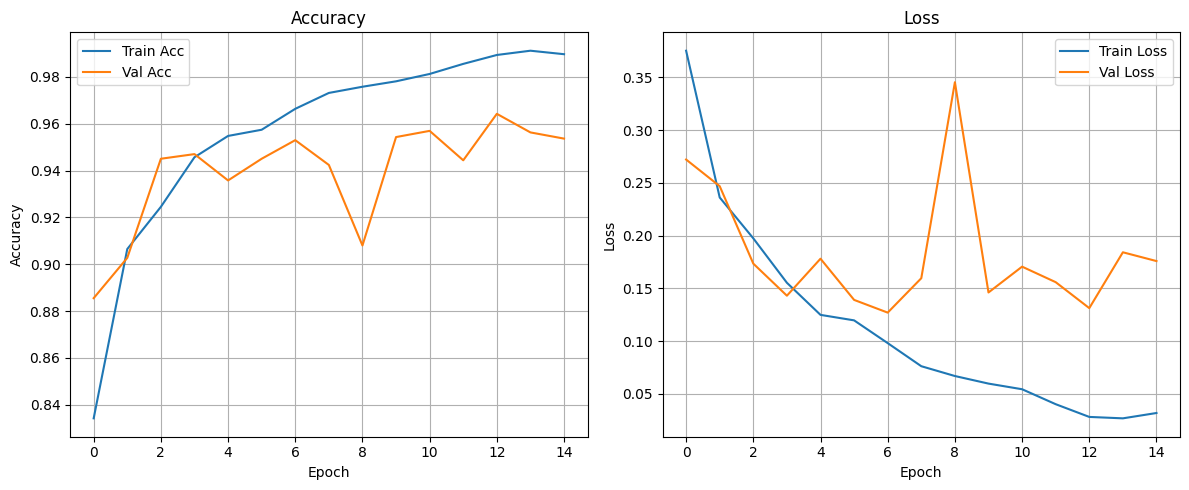

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy
axs[0].plot(history.history['accuracy'], label='Train Acc')
axs[0].plot(history.history['val_accuracy'], label='Val Acc')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Val Loss')
axs[1].set_title('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 


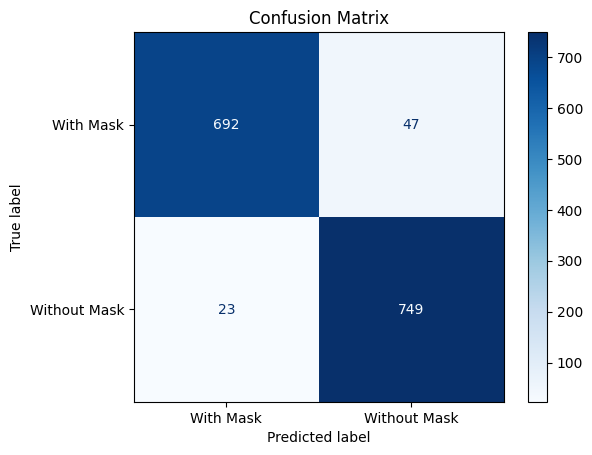

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["With Mask", "Without Mask"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=["With Mask", "Without Mask"]))


              precision    recall  f1-score   support

   With Mask       0.97      0.94      0.95       739
Without Mask       0.94      0.97      0.96       772

    accuracy                           0.95      1511
   macro avg       0.95      0.95      0.95      1511
weighted avg       0.95      0.95      0.95      1511



In [14]:
model.save("face_mask_model.h5")
